In [ ]:
!pip install scienceplots

In [21]:
0.08/0.02

4.0

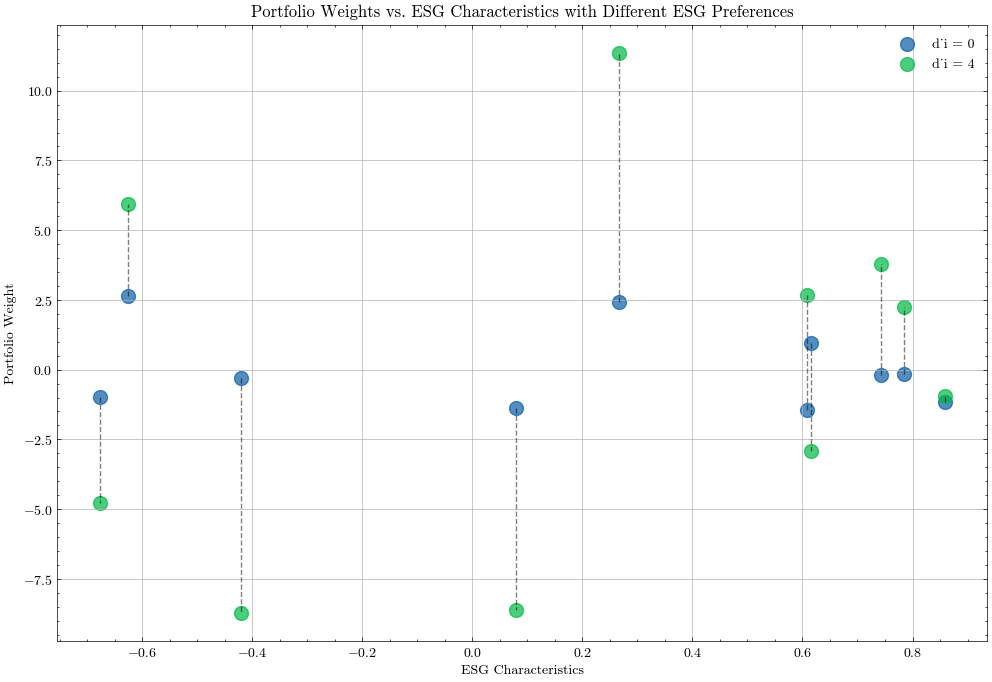

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters for 10 assets
np.random.seed(42)  # For reproducibility
num_assets = 10
mu = np.random.rand(num_assets)  # Expected returns
Sigma = np.random.rand(num_assets, num_assets)
Sigma = (Sigma + Sigma.T) / 2  # Making the covariance matrix symmetric
np.fill_diagonal(Sigma, 1)  # Setting diagonal elements to 1 for simplicity

# Define ESG characteristics with negative values for brown stocks and positive for green stocks
g = np.random.uniform(-1, 1, num_assets)

a = 1  # Risk aversion coefficient
d_values = [0, 4]  # Different fixed values of ESG taste

# Calculate the inverse of the covariance matrix
Sigma_inv = np.linalg.inv(Sigma)

# Define the function to calculate the optimal portfolio
def optimal_portfolio(a, d_i):
    b_i = d_i * g
    X_i = (1 / a) * Sigma_inv.dot(mu + (b_i / a))
    return X_i

# Generate optimal portfolios for different d_i values
portfolios = {}

for d_i in d_values:
    X_i = optimal_portfolio(a, d_i)
    portfolios[d_i] = X_i

# Plot the portfolio weights for d_i = 0 and d_i = 4
plt.figure(figsize=(12, 8))

for d_i in d_values:
    X_i = portfolios[d_i]
    plt.scatter(g, X_i, label=f'd_i = {d_i}', s=100, alpha=0.7)

# Highlighting the difference for each stock
for i in range(num_assets):
    plt.plot([g[i], g[i]], [portfolios[0][i], portfolios[4][i]], 'k--', alpha=0.5)

plt.xlabel('ESG Characteristics')
plt.ylabel('Portfolio Weight')
plt.title('Portfolio Weights vs. ESG Characteristics with Different ESG Preferences')
plt.legend()
plt.grid(True)
plt.show()


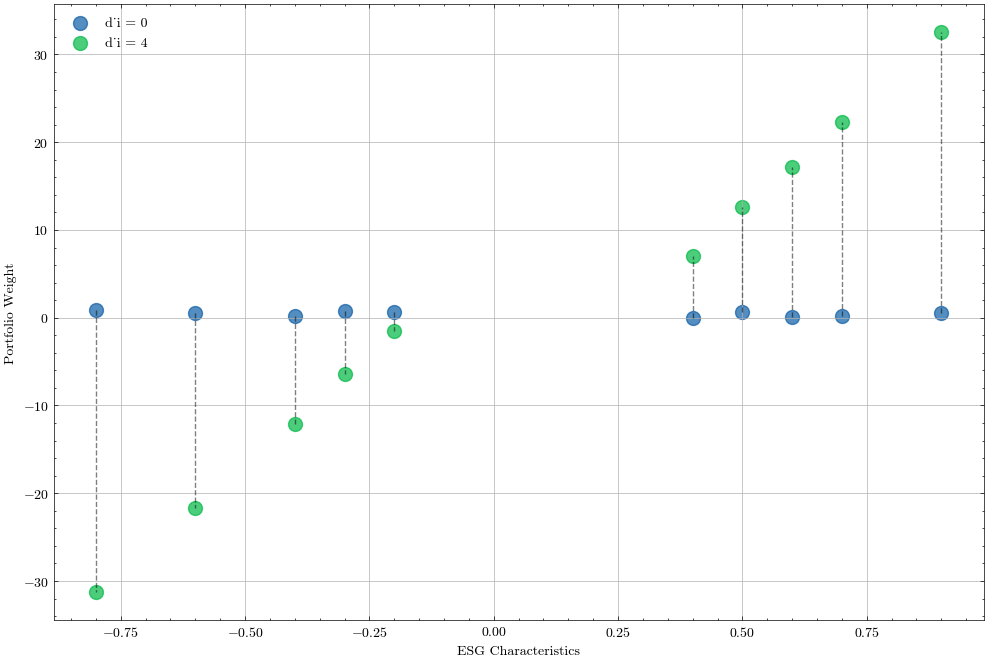

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define specific parameters for 10 assets
num_assets = 10
mu = np.array([0.15, 0.10, 0.12, 0.08, 0.09, 0.11, 0.14, 0.07, 0.13, 0.06])  # Expected returns
Sigma = np.array([
    [0.1, 0.01, 0.02, 0.01, 0.02, 0.01, 0.02, 0.01, 0.02, 0.01],
    [0.01, 0.1, 0.01, 0.02, 0.01, 0.02, 0.01, 0.02, 0.01, 0.02],
    [0.02, 0.01, 0.1, 0.01, 0.02, 0.01, 0.02, 0.01, 0.02, 0.01],
    [0.01, 0.02, 0.01, 0.1, 0.01, 0.02, 0.01, 0.02, 0.01, 0.02],
    [0.02, 0.01, 0.02, 0.01, 0.1, 0.01, 0.02, 0.01, 0.02, 0.01],
    [0.01, 0.02, 0.01, 0.02, 0.01, 0.1, 0.01, 0.02, 0.01, 0.02],
    [0.02, 0.01, 0.02, 0.01, 0.02, 0.01, 0.1, 0.01, 0.02, 0.01],
    [0.01, 0.02, 0.01, 0.02, 0.01, 0.02, 0.01, 0.1, 0.01, 0.02],
    [0.02, 0.01, 0.02, 0.01, 0.02, 0.01, 0.02, 0.01, 0.1, 0.01],
    [0.01, 0.02, 0.01, 0.02, 0.01, 0.02, 0.01, 0.02, 0.01, 0.1]
])  # Covariance matrix
g = np.array([-0.8, 0.9, -0.6, 0.7, -0.4, 0.5, -0.3, 0.6, -0.2, 0.4])  # ESG characteristics

a = 1  # Risk aversion coefficient
d_values = [0, 4]  # Different fixed values of ESG taste

# Calculate the inverse of the covariance matrix
Sigma_inv = np.linalg.inv(Sigma)

# Define the function to calculate the optimal portfolio
def optimal_portfolio(a, d_i):
    b_i = d_i * g
    X_i = (1 / a) * Sigma_inv.dot(mu + (b_i / a))
    return X_i

# Generate optimal portfolios for different d_i values
portfolios = {}

for d_i in d_values:
    X_i = optimal_portfolio(a, d_i)
    portfolios[d_i] = X_i

# Plot the portfolio weights for d_i = 0 and d_i = 4
plt.figure(figsize=(12, 8))

for d_i in d_values:
    X_i = portfolios[d_i]
    plt.scatter(g, X_i, label=f'd_i = {d_i}', s=100, alpha=0.7)

# Highlighting the difference for each stock
for i in range(num_assets):
    plt.plot([g[i], g[i]], [portfolios[0][i], portfolios[4][i]], 'k--', alpha=0.5)

plt.xlabel('ESG Characteristics')
plt.ylabel('Portfolio Weight')
# plt.title('Portfolio Weights vs. ESG Characteristics with Different ESG Preferences')
plt.legend()
plt.grid(True)
plt.savefig('../images/chapter02/portfolio_weights_vs_esg.png', dpi=300)
plt.show()
